In [1]:
!{sys.executable} -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.0 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 392.9 kB/s eta 0:00:0031m13.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 2.4 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.9 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 5.9 MB/s eta 0:00:00m eta 0:00:01m:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.1 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 757.1 kB/s eta 0:00:0031m20.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2023-07-17 21:59:55.977789: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-17 21:59:56.086187: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-17 21:59:57.758504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
url = "https://raw.githubusercontent.com/stevedas/aiBook/main/crimeSTATS.csv"
dataset = pd.read_csv(url)


In [6]:
dataset.head()

,total_crime_reported_per_1_million_res,annual_police_funding_per_res,%_high_school_25yearsPlus,%_16_to_19_not_in_HS,%_18_to_24_in_college,%_college_degree
0,478,40,74,11,31,20
1,494,32,72,11,43,18
2,643,57,70,18,16,16
3,341,31,71,11,25,19
4,773,67,72,9,29,24


In [7]:

# Split the dataset into features and target
y_col = 'total_crime_reported_per_1_million_res'
features = dataset.drop(y_col, axis=1)
target = dataset[y_col]

# Split into training and validation sets (80% train, 20% validation)
train_features = features[:int(0.8 * len(features))]
train_target = target[:int(0.8 * len(target))]
val_features = features[int(0.8 * len(features)):]
val_target = target[int(0.8 * len(target)):]


In [24]:
model = None
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_features.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [25]:
model.compile(optimizer='adam', loss='mse')

In [26]:

# Training history
history = model.fit(train_features, train_target, epochs=100, verbose=0, validation_data=(val_features, val_target))



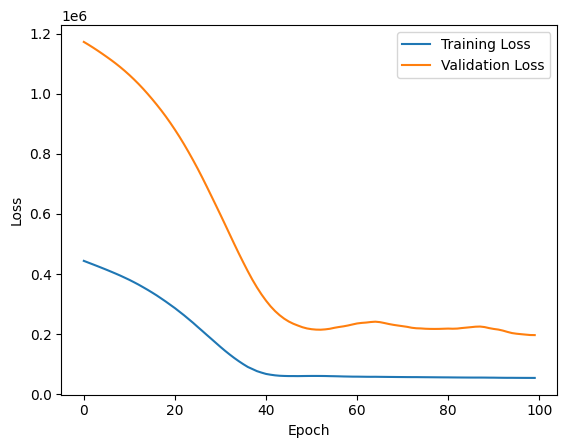

In [27]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Get the predicted values
train_predictions = model.predict(train_features).flatten()
val_predictions = model.predict(val_features).flatten()

# Compute mean squared error
train_mse = np.mean(np.square(train_predictions - train_target))
val_mse = np.mean(np.square(val_predictions - val_target))

1/1 [==============================] - 0s 27ms/step


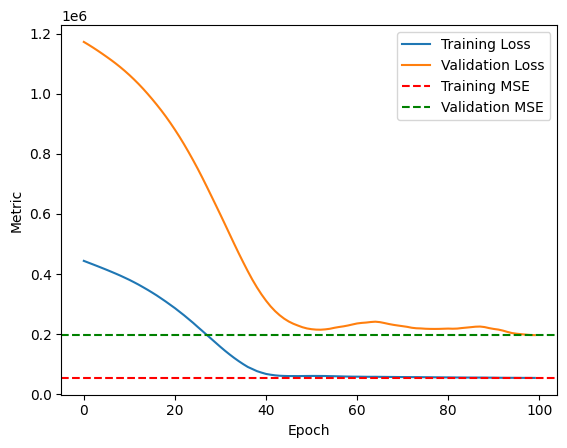

In [29]:



# Plot loss and MSE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=train_mse, color='r', linestyle='--', label='Training MSE')
plt.axhline(y=val_mse, color='g', linestyle='--', label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()